# 將台指期資料匯入python中

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from matplotlib.pylab import date2num
data=pd.read_csv("C:\Users\User\Desktop\程式交易\歷史資料\台灣\TXF1-分鐘-成交價.csv",index_col=0,sep=",")
data.index=pd.to_datetime(data.index)
data=pd.DataFrame(data)
data.head(10)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-2-d188e33f2267>, line 6)

# 利用datafram的形式做敘述統計(ex. 平均日報酬率、標準差等敘述統計)

In [2]:
data_open=data.loc[:,' <Open>'].resample('D').first().dropna()
data_high=data.loc[:,' <High>'].resample('D').max().dropna()
data_low=data.loc[:,' <Low>'].resample('D').min().dropna()
data_close=data.loc[:,' <Close>'].resample('D').last().dropna()
data_volumn=data.loc[:,' <Volume>'].resample('D').sum().dropna()

new_data=pd.concat([data_open,data_high,data_low,data_close],axis=1)
new_data=new_data.loc['2006-01-02':'2018-09-18']
print(new_data)


             <Open>   <High>    <Low>   <Close>
<Date>                                         
2006-01-02   6451.0   6507.0   6411.0    6478.0
2006-01-03   6488.0   6641.0   6460.0    6641.0
2006-01-04   6675.0   6688.0   6603.0    6655.0
2006-01-05   6665.0   6740.0   6652.0    6723.0
2006-01-06   6743.0   6745.0   6692.0    6717.0
2006-01-09   6747.0   6789.0   6744.0    6760.0
2006-01-10   6781.0   6784.0   6705.0    6739.0
2006-01-11   6723.0   6774.0   6686.0    6760.0
2006-01-12   6772.0   6800.0   6701.0    6705.0
2006-01-13   6701.0   6747.0   6677.0    6712.0
2006-01-16   6682.0   6744.0   6660.0    6729.0
2006-01-17   6730.0   6767.0   6688.0    6689.0
2006-01-18   6612.0   6624.0   6461.0    6490.0
2006-01-19   6527.0   6539.0   6460.0    6513.0
2006-01-20   6527.0   6549.0   6451.0    6472.0
2006-01-23   6400.0   6415.0   6378.0    6380.0
2006-01-24   6417.0   6460.0   6405.0    6450.0
2006-01-25   6471.0   6532.0   6453.0    6532.0
2006-02-03   6568.0   6614.0   6545.0   

In [3]:
returns = np.diff(data_close) / data_close[:-1]
a=np.mean(returns)*100
print ('daily average return =%.5f'%a,'%')

b=np.std(returns)
b*=100
print ('standard deviation =%.5f'%b,'%')


daily average return =0.02506 %
standard deviation =1.32881 %


# 均線為依照每天的收盤來做平均所得到的線，請劃出5日均線及10日均線


In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdate

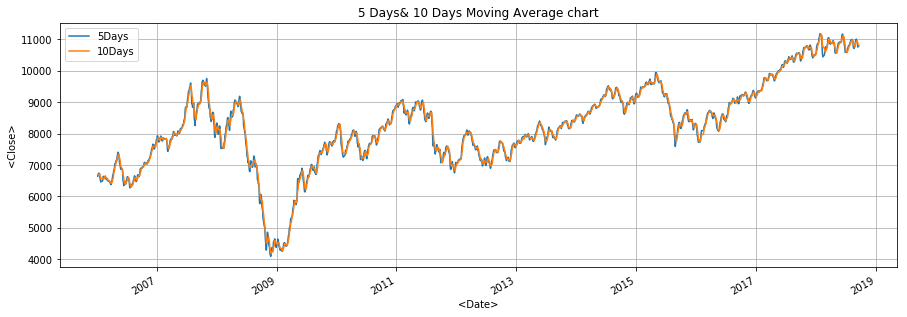

In [5]:
plt.figure(figsize=(15,5))
new_data[' <Close>'].rolling(window=5).mean().plot(grid=True,label='5Days')
new_data[' <Close>'].rolling(window=10).mean().plot(grid=True,label='10Days')
plt.title('5 Days& 10 Days Moving Average chart')
plt.xlabel('<Date>')
plt.ylabel('<Close>')
plt.legend(loc='best')
plt.show()

# 若5日均線大於10日均線，給出買進訊號；反之售出

In [1]:
new_data['m5']=new_data[' <Close>'].rolling(window=5).mean()
new_data['m10']=new_data[' <Close>'].rolling(window=10).mean()
new_data['m5-m10']=new_data['m5']-new_data['m10']

new_data["Signal"]=new_data.apply(lambda x:1 if x["m5"]>x["m10"] else -1,axis=1)
new_data=new_data.dropna()
e=new_data['Signal']-new_data['Signal'].shift(1)  
enonan = np.where(np.isnan(e),0,e)
abs_enonan=abs(enonan)          
new_data["Signal_change"]=enonan
new_data["Signal_change"]=-(abs_enonan/2)  
new_data["滑價"]=(new_data["Signal_change"].shift(1))*1200      
new_data["Signal_change"]=new_data["Signal_change"].replace(to_replace=0, value=1) 
#new_data['*m5-m10*']=new_data['m5-m10'].shift()
#X=0
#new_data['Stance'] = np.where((new_data['m5-m10'] > X) & (new_data['*m5-m10*'] < X), 1, 0)
#new_data['Stance'] = np.where((new_data['m5-m10'] < X) & (new_data['*m5-m10*'] > X), -1, new_data['Stance'])
#new_data['Stance']

NameError: name 'new_data' is not defined

* +1:做多
* -1:做空
* 昨+1今+1: --> (close-open)+(open-close(1))
* 昨+1今-1: --> (close-open)-(open-close(1))
* 昨-1今+1: --> -(close-open)-(open-close(1))
* 昨-1今-1: --> -(close-open)+(open-close(1))

# 畫出每日損益圖

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.h

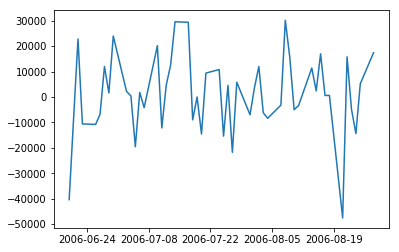

In [24]:
new_data["每日損益"]=(new_data[" <Close>"]-new_data[' <Open>'])*200*new_data["Signal"].shift(1)+(new_data[" <Open>"]-new_data[" <Close>"].shift(1))*200*(new_data["Signal_change"].shift(1)*new_data["Signal"].shift(1))+new_data["滑價"]         
new_data["每日損益"][0]=0
new_data["Signal_change"]=new_data["Signal_change"].shift(1)
plt.plot(new_data["每日損益"][100:150])